# Thinkful Visualization Challenge #

The purpose of this notebook is to practice the matplotlib package on some public datasets for the Thinkful Data Science Prep Course Visualization Challenge.  I chose the Global Terrorism dataset to practice using matplotlib.  This dataset was found on the Kaggle site.  

In [53]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### 1.Read in dataset ### 

In [54]:
terror = pd.read_csv('terrorist.csv', encoding = "ISO-8859-1", low_memory=False)

### 2. Initial Look at Dataset ###

In [55]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [56]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


### 3. Convert Column Names ###

I got this method of converting the column names from the user I,Coder on Kaggle.  The purpose of converting the column names is to make the column names more recognizable.  

In [57]:
#Rename columns
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

#Create new dataframe with only these columns
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

#Create casualty column which is a sum of the Killed and Wounded Columns
terror['casualities']=terror['Killed']+terror['Wounded']

#Check to see what the first rows of the new dataframe looks like
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


### 4. Scatter Plot of Number of People Killed by Year ###

In [58]:
# Create unique list of years and create an empty list that will contain sum of people killed that year
years_list = terror['Year'].unique()
killed_list= []

#Iterate through unique year list and for each year sum the number of people killed in that year and append to list
for year in years_list:
    x = terror[(terror['Year'] == year)]
    killed_list.append(x['Killed'].sum())

#Create data frame which contains the number of people killed each year and then print dataframe
year_sumkilled = np.array(killed_list)
year_sumkilled = pd.DataFrame(year_sumkilled)
year_sumkilled.columns = ['Killed that Year']
year_sumkilled.index = years_list
print(year_sumkilled)

      Killed that Year
1970             171.0
1971             173.0
1972             566.0
1973             370.0
1974             542.0
1975             617.0
1976             672.0
1977             456.0
1978            1459.0
1979            2100.0
1980            4391.0
1981            4851.0
1986            4976.0
1982            5135.0
1983            9444.0
1984           10450.0
1985            7094.0
1987            6476.0
1988            7189.0
1989            8136.0
1990            7148.0
1991            8429.0
1992            9745.0
1994            7691.0
1995            6094.0
1996            6965.0
1997           10928.0
1998            4688.0
1999            3388.0
2000            4402.0
2001            7743.0
2002            4799.0
2003            3278.0
2004            5718.0
2005            6313.0
2006            9362.0
2007           12858.0
2008            9135.0
2009            9271.0
2010            7727.0
2011            8228.0
2012           15436.0
2013       

<function matplotlib.pyplot.show>

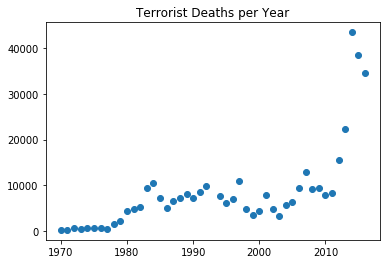

In [59]:
#Create a scatter plot of the number of people killed each year 
plt.scatter(x = year_sumkilled.index, y = year_sumkilled['Killed that Year'])
plt.title('Terrorist Deaths per Year')
plt.show

Looking at the plot, the 1970's were a decade where there were relatively few people killed by terrorist activity.  But after the 80's, there is a noticeable incremental increase in the number of people killed by terrorist activity.  After the year 2010, the number of people killed rose sharply.  

### 5. Bar Graph of Number of People Killed by Region ###

In [60]:
# Create unique list of regions and create an empty list that will contain sum of people killed in that region
region_list = terror['Region'].unique()
killed_listregion = []

#Iterate through unique region list and for each region sum the number of people killed in that region and append to list
for region in region_list:
    x = terror[(terror['Region'] == region)]
    killed_listregion.append(x['Killed'].sum())

#Create data frame which contains the number of people killed in each region and then print dataframe
region_sumkilled = np.array(killed_listregion)
region_sumkilled = pd.DataFrame(region_sumkilled)
region_sumkilled.columns = ['Killed in that Region']
region_sumkilled.index = region_list
print(region_sumkilled)

                             Killed in that Region
Central America & Caribbean                28704.0
North America                               4764.0
Southeast Asia                             14819.0
Western Europe                              6595.0
East Asia                                   1138.0
South America                              28730.0
Eastern Europe                              7311.0
Sub-Saharan Africa                         71244.0
Middle East & North Africa                125676.0
Australasia & Oceania                        146.0
South Asia                                 93434.0
Central Asia                                 993.0


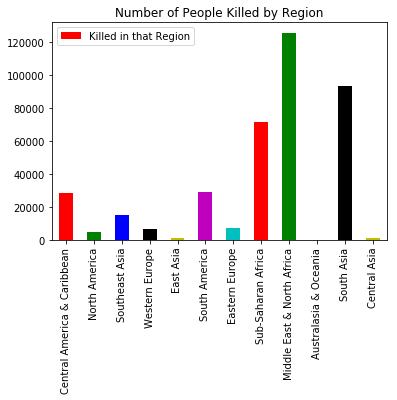

In [61]:
#Create bar graph of number of people killed in each region
my_colors = 'rgbkymc'
region_sumkilled.plot(kind='bar',
                      color=my_colors,
                      title='Number of People Killed by Region')

Looking at the bar graph, the most violent region in terms of people killed by terrorist activity is the Middle East & North Africa Region.  The second and third most violent regions are South Asia and Sub-Saharan Africa.  The western countries are relatively low in number of people killed by terrorist activity. 

### 6. Bar Graph Subplots of the Top 3 Violent Regions by Country ###

In [92]:
# Create unique list of countries in the Middle East region and create an empty list that will contain sum of people killed in that country
Middle_East = terror[(terror['Region'] == 'Middle East & North Africa')]
Middle_Eastcountry = Middle_East['Country'].unique()
killed_listme = []

#Iterate through unique country list and for each country sum the number of people killed in that country and append to list
for country in Middle_Eastcountry:
    x = terror[(terror['Country'] == country)]
    killed_listme.append(x['Killed'].sum())

#Create data frame which contains the number of people killed in each Middle Eastern country and then sort the data frame
middleeast_sumkilled = np.array(killed_listme)
middleeast_sumkilled = pd.DataFrame(middleeast_sumkilled)
middleeast_sumkilled.columns = ['Killed in that Country']
middleeast_sumkilled.index = Middle_Eastcountry
middleeast_sumkilled = middleeast_sumkilled.sort_values(['Killed in that Country'], ascending = False)

#To make the subplot more readable I will only print the top 9 deadliest countries in that region
middleeast_sumkilled9 = middleeast_sumkilled.iloc[0:9]
print(middleeast_sumkilled9)

         Killed in that Country
Iraq                    71082.0
Syria                   13132.0
Algeria                 11091.0
Yemen                    8011.0
Turkey                   6664.0
Lebanon                  4038.0
Egypt                    2947.0
Libya                    2308.0
Israel                   1666.0


In [93]:
# Create unique list of countries in the Sub-Saharan Africa region and create an empty list that will contain sum of people killed in that country
Saharan_Africa = terror[(terror['Region'] == 'Sub-Saharan Africa')]
Saharan_Africacountry = Saharan_Africa['Country'].unique()
killed_listsouthafrica = []

#Iterate through unique country list and for each country sum the number of people killed in that country and append to list
for country in Saharan_Africacountry:
    x = terror[(terror['Country'] == country)]
    killed_listsouthafrica.append(x['Killed'].sum())

#Create data frame which contains the number of people killed in each Sub-Sahara African country and then sort the data frame
saharaafrica_sumkilled = np.array(killed_listsouthafrica)
saharaafrica_sumkilled = pd.DataFrame(saharaafrica_sumkilled)
saharaafrica_sumkilled.columns = ['Killed in that Country']
saharaafrica_sumkilled.index = Saharan_Africacountry
saharaafrica_sumkilled = saharaafrica_sumkilled.sort_values(['Killed in that Country'], ascending = False)

#To make the subplot more readable I will only print the top 9 deadliest countries in that region
saharaafrica_sumkilled9 = saharaafrica_sumkilled.iloc[0:9]
print(saharaafrica_sumkilled9)

                                  Killed in that Country
Nigeria                                          20665.0
Somalia                                           8254.0
Burundi                                           4182.0
Sudan                                             3801.0
Democratic Republic of the Congo                  3460.0
Rwanda                                            3234.0
Uganda                                            3058.0
Angola                                            3036.0
Mozambique                                        2689.0


In [88]:
# Create unique list of countries in the South Asia region and create an empty list that will contain sum of people killed in that country
South_Asia = terror[(terror['Region'] == 'South Asia')]
South_Asiacountry = South_Asia['Country'].unique()
killed_listsouthasia = []

#Iterate through unique country list and for each country sum the number of people killed in that country and append to list
for country in South_Asiacountry:
    x = terror[(terror['Country'] == country)]
    killed_listsouthasia.append(x['Killed'].sum())

#Create data frame which contains the number of people killed in each South Asian country and then sort the dataframe
southasia_sumkilled = np.array(killed_listsouthasia)
southasia_sumkilled = pd.DataFrame(southasia_sumkilled)
southasia_sumkilled.columns = ['Killed in that Country']
southasia_sumkilled.index = South_Asiacountry
southasia_sumkilled = southasia_sumkilled.sort_values(['Killed in that Country'], ascending = False)
print(southasia_sumkilled)

             Killed in that Country
Afghanistan                 33146.0
Pakistan                    22734.0
India                       18842.0
Sri Lanka                   15528.0
Nepal                        1968.0
Bangladesh                   1207.0
Bhutan                          9.0
Mauritius                       0.0
Maldives                        0.0
             Killed in that Country
Afghanistan                 33146.0
Pakistan                    22734.0
India                       18842.0
Sri Lanka                   15528.0
Nepal                        1968.0


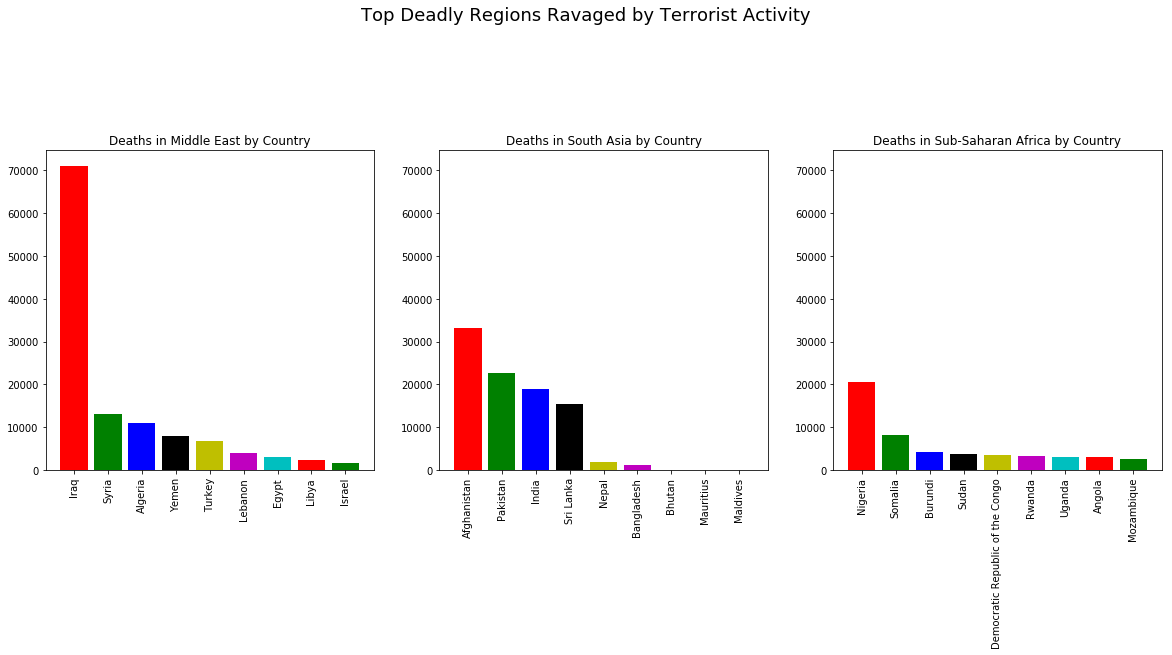

In [102]:
#Print three bar graph subplots of the deadliest regions and show the deadliest 9 countries in that region
positions = [1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(20, 20))
plt.suptitle('Top Deadly Regions Ravaged by Terrorist Activity', fontsize=18)

a1 = plt.subplot(3, 3, 1)
plt.title('Deaths in Middle East by Country')
plt.bar(positions, height = middleeast_sumkilled9['Killed in that Country'] , color= my_colors)
plt.xticks(positions, middleeast_sumkilled.index, rotation='vertical')

plt.subplot(3, 3, 2, sharey = a1)
plt.title('Deaths in South Asia by Country')
plt.bar(positions, height = southasia_sumkilled['Killed in that Country'] , color= my_colors)
plt.xticks(positions, southasia_sumkilled.index, rotation='vertical')

plt.subplot(3, 3, 3, sharey = a1)
plt.title('Deaths in Sub-Saharan Africa by Country')
plt.bar(positions, height = saharaafrica_sumkilled9['Killed in that Country'] , color= my_colors)
plt.xticks(positions, saharaafrica_sumkilled.index, rotation='vertical')

plt.show()

Looking at the subplots, Iraq accounts for an overwhelming majority of the terrorist deaths in the Middle East.  The number of deaths in Iraq is about seven times the number of deaths in the second deadliest country in the Middle East. Also, the total deaths for Iraq is greater than the sum of the top country in South Asia with the top country in Sub-Saharan Africa.  

### 7. Scatter Plot of Iraq's Deaths Over Time ###

In [112]:
# Create unique list of years and create an empty list that will contain sum of people killed that year in Iraq
Iraq = terror[(terror['Country'] == 'Iraq')]
Iraq_time= Iraq['Year'].unique()
killed_timeiraq = []

#Iterate through unique year list and for each year sum the number of people killed in that year and append to list
for year in Iraq_time:
    x = Iraq[(Iraq['Year'] == year)]
    killed_timeiraq.append(x['Killed'].sum())

#Create data frame which contains the number of people killed each year in Iraq and then print dataframe
year_sumkilled_iraq = np.array(killed_timeiraq)
year_sumkilled_iraq = pd.DataFrame(year_sumkilled_iraq)
year_sumkilled_iraq.columns = ['Killed that Year']
year_sumkilled_iraq.index = Iraq_time
print(year_sumkilled_iraq)


      Killed that Year
1975               0.0
1976              12.0
1979               1.0
1980               8.0
1981               0.0
1982              96.0
1983               1.0
1984               0.0
1987               0.0
1988              43.0
1989               0.0
1991               1.0
1992             117.0
1994              75.0
1995             156.0
1996              11.0
1997             106.0
1998              19.0
1999              32.0
2000              10.0
2001               9.0
2002              10.0
2003             354.0
2004            2151.0
2005            3380.0
2006            4612.0
2007            6665.0
2008            2864.0
2009            2583.0
2010            2071.0
2011            1870.0
2012            2686.0
2013            7038.0
2014           13079.0
2015            8835.0
2016           12187.0
71082.0
71082.0


<function matplotlib.pyplot.show>

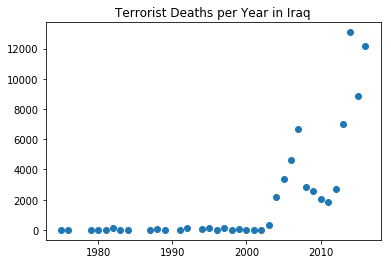

In [113]:
#Create a scatter plot of the number of people killed each year 
plt.scatter(x = year_sumkilled_iraq.index, y = year_sumkilled_iraq['Killed that Year'])
plt.title('Terrorist Deaths per Year in Iraq')
plt.show

Looking at the time series plot of the deaths, close to half of Iraq's total terrorist deaths occurred in the past three years.  The years from 1975-2002 had relatively few terrorist deaths.  But after 2002, the number of deaths due to terrorist attacks started to increase.  